Analyzing NYC's Restaurant Grading System

In [3]:
import pandas as pd

/Users/misha/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
df = pd.read_csv("Restaurant_Grades.csv")
df.head(3)

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE
0,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Hand washing facility not provided in or near ...,Critical,19,B,06/05/2013,01/24/2022
1,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Non-food contact surface improperly constructe...,Not Critical,19,B,06/05/2013,01/24/2022
2,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Cold food item held above 41º F (smoked fish a...,Critical,19,B,06/05/2013,01/24/2022


In [5]:
# Replace spaces with underscores
df.columns = df.columns.str.replace("CUISINE DESCRIPTION","CUISINE")
df.columns = df.columns.str.replace(" ","_")
df.head(3)

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE
0,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Hand washing facility not provided in or near ...,Critical,19,B,06/05/2013,01/24/2022
1,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Non-food contact surface improperly constructe...,Not Critical,19,B,06/05/2013,01/24/2022
2,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Cold food item held above 41º F (smoked fish a...,Critical,19,B,06/05/2013,01/24/2022


In [6]:
# Convert dates to datetime
df.GRADE_DATE = pd.to_datetime(df.GRADE_DATE, format="%m/%d/%Y")
df.RECORD_DATE = pd.to_datetime(df.RECORD_DATE, format="%m/%d/%Y")

In [7]:
df.head(3)

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE
0,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Hand washing facility not provided in or near ...,Critical,19,B,2013-06-05,2022-01-24
1,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Non-food contact surface improperly constructe...,Not Critical,19,B,2013-06-05,2022-01-24
2,SOFRA HOMEMADE FOOD,Brooklyn,2122,86 STREET,11214.0,Turkish,Cold food item held above 41º F (smoked fish a...,Critical,19,B,2013-06-05,2022-01-24


In [8]:
df.value_counts()

DBA                    BORO       BUILDING  STREET                  ZIPCODE  CUISINE             VIOLATION_DESCRIPTION                                                                                                                                                                                                                                                            CRITICAL_FLAG  SCORE  GRADE  GRADE_DATE  RECORD_DATE
RADIO CITY MUSIC HALL  Manhattan  1260      AVENUE OF THE AMERICAS  10020.0  American            Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.  Not Critical   2      A      2018-11-09  2022-01-24     4
CAFE GITANE            Manhattan  242       MOTT STREET             10012.0  Moroccan            Proper sanitization not provided for utensil ware wa

In [12]:
this_year = df[df['GRADE_DATE'].dt.year == 2021]
this_year

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE
172608,HOME MADE COOKING CAFE,Brooklyn,504,BRIGHTON BEACH AVENUE,11235.0,Russian,Food not protected from potential source of co...,Critical,9,Z,2021-06-09,2022-01-24
172609,HOME MADE COOKING CAFE,Brooklyn,504,BRIGHTON BEACH AVENUE,11235.0,Russian,Proper sanitization not provided for utensil w...,Not Critical,9,Z,2021-06-09,2022-01-24
172610,NATURE'S GRILL,Brooklyn,283,SMITH STREET,11231.0,American,NaN,Not Applicable,0,A,2021-06-11,2022-01-24
172611,TEXAS CHICKEN & BURGERS,Brooklyn,730,BROADWAY,11206.0,Chicken,Facility not vermin proof. Harborage or condit...,Not Critical,10,A,2021-07-08,2022-01-24
172612,TEXAS CHICKEN & BURGERS,Brooklyn,730,BROADWAY,11206.0,Chicken,Filth flies or food/refuse/sewage-associated (...,Critical,10,A,2021-07-08,2022-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
182655,SAPORE D ITALIA RESTAURANT,Brooklyn,160,IRVING AVENUE,11237.0,Italian,Hand washing facility not provided in or near ...,Critical,12,A,2021-12-30,2022-01-24
182656,"DUNKIN DONUTS, BASKIN ROBBINS",Brooklyn,453,MOTHER GASTON BOULEVARD,11212.0,Donuts,Facility not vermin proof. Harborage or condit...,Not Critical,11,A,2021-12-30,2022-01-24
182657,THE BAY CAFE,Brooklyn,2,NEPTUNE AVENUE,11235.0,Jewish/Kosher,Food not protected from potential source of co...,Critical,13,A,2021-12-30,2022-01-24
182658,SAPORE D ITALIA RESTAURANT,Brooklyn,160,IRVING AVENUE,11237.0,Italian,Proper sanitization not provided for utensil w...,Not Critical,12,A,2021-12-30,2022-01-24


In [13]:
this_year.value_counts()

DBA                              BORO       BUILDING  STREET            ZIPCODE  CUISINE                         VIOLATION_DESCRIPTION                                                                                                                                                                                                                                                            CRITICAL_FLAG  SCORE  GRADE  GRADE_DATE  RECORD_DATE
LA PALAPA TACOS                  Manhattan  230       PARK AVENUE       10169.0  Tex-Mex                         Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.  Not Critical   9      A      2021-08-23  2022-01-24     3
GO CUPS                          Manhattan  1838      2 AVENUE          10128.0  Juice, Smoothies, Fruit Salads  Non-

In [14]:
this_year.tail(5)

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE
182655,SAPORE D ITALIA RESTAURANT,Brooklyn,160,IRVING AVENUE,11237.0,Italian,Hand washing facility not provided in or near ...,Critical,12,A,2021-12-30,2022-01-24
182656,"DUNKIN DONUTS, BASKIN ROBBINS",Brooklyn,453,MOTHER GASTON BOULEVARD,11212.0,Donuts,Facility not vermin proof. Harborage or condit...,Not Critical,11,A,2021-12-30,2022-01-24
182657,THE BAY CAFE,Brooklyn,2,NEPTUNE AVENUE,11235.0,Jewish/Kosher,Food not protected from potential source of co...,Critical,13,A,2021-12-30,2022-01-24
182658,SAPORE D ITALIA RESTAURANT,Brooklyn,160,IRVING AVENUE,11237.0,Italian,Proper sanitization not provided for utensil w...,Not Critical,12,A,2021-12-30,2022-01-24
182659,"DUNKIN DONUTS, BASKIN ROBBINS",Brooklyn,453,MOTHER GASTON BOULEVARD,11212.0,Donuts,Pesticide use not in accordance with label or ...,Not Critical,11,A,2021-12-30,2022-01-24


/var/folders/7j/5h5yf6k54nz1ys4trym9bls40000gn/T/ipykernel_9669/3045607055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_year["KEY"] = this_year[['DBA', 'BUILDING', "STREET", "ZIPCODE"]].astype(str).apply(lambda x: ' '.join(x), axis=1)


,count all,perc all,count most recent,perc most recent
GRADE,,,,
A,"8,289.00",82.46,"3,659.00",89.84
B,442.00,4.40,102.00,2.50
C,344.00,3.42,52.00,1.28
N,6.00,0.06,2.00,0.05
P,31.00,0.31,16.00,0.39
Z,940.00,9.35,242.00,5.94


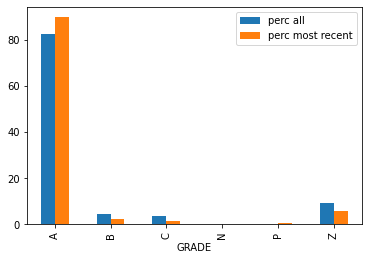

In [17]:
this_year["KEY"] = this_year[['DBA', 'BUILDING', "STREET", "ZIPCODE"]].astype(str).apply(lambda x: ' '.join(x), axis=1)
gb_all = this_year.groupby("GRADE").GRADE.agg(["count"])
gb_all["perc"] = gb_all / gb_all.sum() * 100

gb_recent = this_year.drop_duplicates("KEY").groupby("GRADE").GRADE.agg(["count"])
gb_recent["perc"] = gb_recent / gb_recent.sum() * 100

gb_all = gb_all.join(gb_recent,lsuffix=" all", rsuffix=" most recent")#

gb_all[["perc all", "perc most recent"]].plot(kind="bar")
gb_all.style.format("{:,.2f}")

/var/folders/7j/5h5yf6k54nz1ys4trym9bls40000gn/T/ipykernel_9669/1021333165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count all,perc all,count most recent,perc most recent
SCORE,,,,
0,46.00,0.46,37.00,0.91
2,280.00,2.79,279.00,6.85
3,171.00,1.70,112.00,2.75
4,227.00,2.26,115.00,2.82
5,387.00,3.85,265.00,6.51
6,145.00,1.44,65.00,1.60
7,595.00,5.92,337.00,8.27
8,378.00,3.76,168.00,4.12
9,844.00,8.40,352.00,8.64


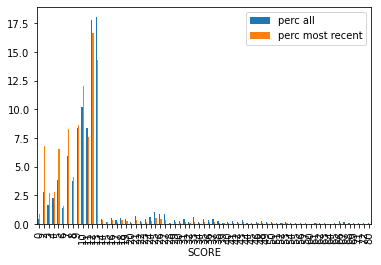

In [31]:
this_year["KEY"] = this_year[['DBA', 'BUILDING', "STREET", "ZIPCODE"]].astype(str).apply(lambda x: ' '.join(x), axis=1)
fscore = this_year.groupby("SCORE").SCORE.agg(["count"])
fscore["perc"] = fscore / fscore.sum() * 100

fscore_recent = this_year.drop_duplicates("KEY").groupby("SCORE").GRADE.agg(["count"])
fscore_recent["perc"] = fscore_recent / fscore_recent.sum() * 100

fscore = fscore.join(fscore_recent,lsuffix=" all", rsuffix=" most recent")#

fscore[["perc all", "perc most recent"]].plot(kind="bar")
fscore.style.format("{:,.2f}")